In [1]:
using ITensors
using Plots

In [3]:
let
  N = 100
  sites = siteinds("S=1",N)

  ampo = OpSum()
  for j=1:N-1
    ampo += 0.5,"S+",j,"S-",j+1
    ampo += 0.5,"S-",j,"S+",j+1
    ampo += "Sz",j,"Sz",j+1
  end
  H = MPO(ampo,sites)

  sweeps = Sweeps(5) # number of sweeps is 5
  maxdim!(sweeps,10,20,100,100,200) # gradually increase states kept
  cutoff!(sweeps,1E-10) # desired truncation error

  psi0 = randomMPS(sites,2)

  energy,psi = dmrg(H,psi0,sweeps)

  return
end

After sweep 1 energy=-138.09240029167813  maxlinkdim=10 maxerr=4.30E-04 time=19.212
After sweep 2 energy=-138.93475852538467  maxlinkdim=20 maxerr=4.47E-06 time=0.922
After sweep 3 energy=-138.94006919081733  maxlinkdim=87 maxerr=1.00E-10 time=4.698
After sweep 4 energy=-138.94008565881646  maxlinkdim=100 maxerr=1.04E-10 time=9.271
After sweep 5 energy=-138.9400860550117  maxlinkdim=101 maxerr=9.99E-11 time=9.911


In [4]:
k = Index(4,"index_k")
m = Index(2,"index_m")

T = randomITensor(k,m)
@show T


T = ITensor ord=2
Dim 1: (dim=4|id=987|"index_k")
Dim 2: (dim=2|id=977|"index_m")
NDTensors.Dense{Float64, Vector{Float64}}
 4×2
  1.1237629473680055   -1.366149287341093
 -3.123195362264467     1.3641795644002568
 -0.04852838102648758   0.004225387190353177
  0.4052306422378497   -0.5625994319063385


ITensor ord=2 (dim=4|id=987|"index_k") (dim=2|id=977|"index_m")
NDTensors.Dense{Float64, Vector{Float64}}

In [8]:
@show inds(T)


inds(T) = ((dim=4|id=434|"index_k"), (dim=2|id=22|"index_m"))


((dim=4|id=434|"index_k"), (dim=2|id=22|"index_m"))

In [9]:
i = Index(3,"i")
j = Index(2,"j")
k = Index(4,"k")

A = randomITensor(i,j,k)
B = randomITensor(i,j,k)
C = randomITensor(k,i,j)

ITensor ord=3 (dim=4|id=665|"k") (dim=3|id=118|"i") (dim=2|id=360|"j")
NDTensors.Dense{Float64, Vector{Float64}}

In [13]:
R3 = A + B - C

@show R3

R3 = ITensor ord=3
Dim 1: (dim=3|id=118|"i")
Dim 2: (dim=2|id=360|"j")
Dim 3: (dim=4|id=665|"k")
NDTensors.Dense{Float64, Vector{Float64}}
 3×2×4
[:, :, 1] =
 -1.6055650927926872   -1.835853735617804
 -0.30578380803391125   4.103735963285102
  2.8669987941868285   -2.9469073995205926

[:, :, 2] =
 -1.3736525081879511  3.111098671220633
  1.4073268489227293  4.0612069969830245
 -1.415296143555833   2.994237261693078

[:, :, 3] =
 -0.057149586164500776   0.32134859691488393
 -0.19747723831025      -1.0164249280411997
 -0.29988412164369427   -0.9036859503911077

[:, :, 4] =
  4.159805355197249   -1.3481165100650974
 -1.0908706533570742   0.6267248038557913
  0.2981836825438828  -0.9358380849894992


ITensor ord=3 (dim=3|id=118|"i") (dim=2|id=360|"j") (dim=4|id=665|"k")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
let
  N = 100
  cutoff = 1E-8
  tau = 0.1
  ttotal = 5.0

  # Make an array of 'site' indices
  s = siteinds("S=1/2", N; conserve_qns=false)

  # Make gates (1,2),(2,3),(3,4),...
  gates = ITensor[]
  for j in 1:(N - 1)
    s1 = s[j]
    s2 = s[j + 1]
    hj =
      op("Sz", s1) * op("Sz", s2) +
      1 / 2 * op("S+", s1) * op("S-", s2) +
      1 / 2 * op("S-", s1) * op("S+", s2)
    Gj = exp(-im * tau / 2 * hj)
    push!(gates, Gj)
  end
  # Include gates in reverse order too
  # (N,N-1),(N-1,N-2),...
  append!(gates, reverse(gates))

  # Initialize psi to be a product state 
  psi = productMPS(s, n -> isodd(n) ? "Up" : "Dn")


  c = div(N, 2) # center site

  # Compute and print <Sz> at each time step
  # then apply the gates to go to the next time
  for t in 0.0:tau:ttotal
    Sz = expect(psi, "Sz"; sites=c)
    println("$t $Sz")

    t≈ttotal && break

    psi = apply(gates, psi; cutoff)
    normalize!(psi)
  end

  return
end


In [88]:
helixstate(40,10.4)

MPS
[1] ((dim=2|id=383|"Qubit,Site,n=1"), (dim=1|id=710|"Link,l=1"))
[2] ((dim=1|id=710|"Link,l=1"), (dim=2|id=384|"Qubit,Site,n=2"), (dim=1|id=432|"Link,l=2"))
[3] ((dim=1|id=432|"Link,l=2"), (dim=2|id=812|"Qubit,Site,n=3"), (dim=1|id=788|"Link,l=3"))
[4] ((dim=1|id=788|"Link,l=3"), (dim=2|id=658|"Qubit,Site,n=4"), (dim=1|id=659|"Link,l=4"))
[5] ((dim=1|id=659|"Link,l=4"), (dim=2|id=167|"Qubit,Site,n=5"), (dim=1|id=280|"Link,l=5"))
[6] ((dim=1|id=280|"Link,l=5"), (dim=2|id=262|"Qubit,Site,n=6"), (dim=1|id=379|"Link,l=6"))
[7] ((dim=1|id=379|"Link,l=6"), (dim=2|id=571|"Qubit,Site,n=7"), (dim=1|id=953|"Link,l=7"))
[8] ((dim=1|id=953|"Link,l=7"), (dim=2|id=977|"Qubit,Site,n=8"), (dim=1|id=682|"Link,l=8"))
[9] ((dim=1|id=682|"Link,l=8"), (dim=2|id=482|"Qubit,Site,n=9"), (dim=1|id=48|"Link,l=9"))
[10] ((dim=1|id=48|"Link,l=9"), (dim=2|id=208|"Qubit,Site,n=10"), (dim=1|id=373|"Link,l=10"))
[11] ((dim=1|id=373|"Link,l=10"), (dim=2|id=592|"Qubit,Site,n=11"), (dim=1|id=493|"Link,l=11"))
[12] (

In [40]:
N=40;

function helixstate(λ;flip=false)
    Q=2*pi/λ
    sites = siteinds("Qubit", N; conserve_qns=false)
    psi = MPS(N)

    states = [state(sites[j], "X+") for j in 1:N]
    [states[j][2]=cos((j)*Q/2+0.25*pi*flip) for j in 1:N]
    [states[j][1]=-sin((j)*Q/2+0.25*pi*flip) for j in 1:N]

    links = [Index(1; tags="Link,l=$n") for n in 1:N]


    psi[1] = ITensor(Float64, sites[1], links[1])
    psi[1] += states[1] * state(links[1], 1)
    
    for n in 2:(N - 1)
        psi[n] = ITensor(Float64, dag(links[n - 1]), sites[n], links[n])
        psi[n] += state(dag(links[n - 1]), 1) * states[n] * state(links[n], 1)
    end

    psi[N] = ITensor(Float64, dag(links[N - 1]), sites[N])
    psi[N] += state(dag(links[N - 1]), 1) * states[N]
    
    return(sites,psi)
end

function XXZquench(λ,ttotal,τ; Δ=0,flip=false)
    
    sites,psi=helixstate(λ;flip=flip)

    cutoff = 1E-9
    gates = ITensor[]

    for j in 1:(N - 1)
      s1 = sites[j]
      s2 = sites[j + 1]
      hj =
        Δ*op("Sz", s1) * op("Sz", s2) +
        1 / 2 * op("S+", s1) * op("S-", s2) +
        1 / 2 * op("S-", s1) * op("S+", s2)
      Gj = exp(-im * τ / 2 * hj)
      push!(gates, Gj)
    end
# Include gates in reverse order too
# (N,N-1),(N-1,N-2),...
    append!(gates, reverse(gates))

    Szlist=[]
    for t in 0.0:τ:ttotal
      Sz = expect(psi, "Sz")
      print(isinteger(t) ? "$t" : "   ")
      push!(Szlist,Sz)
      t≈ttotal && break
      psi = apply(gates, psi; cutoff, maxdim=800)
      normalize!(psi)
    end
println("   ")
return(Szlist)

end

XXZquench (generic function with 1 method)

In [139]:
sites = siteinds("Qubit", N; conserve_qns=false)
psi = MPS(N)

states = [state(sites[j], "X+") for j in 1:N]
[states[j][1]=cos(j*pi/10.4) for j in 1:N]
[states[j][2]=-sin(j*pi/10.4) for j in 1:N]

links = [Index(1; tags="Link,l=$n") for n in 1:N]


psi[1] = ITensor(Float64, sites[1], links[1])
psi[1] += states[1] * state(links[1], 1)


sites = siteinds("Qubit", N; conserve_qns=false)
psi = MPS(N)

states = [state(sites[j], "X+") for j in 1:N]
[states[j][1]=cos(j*pi/10.4) for j in 1:N]
[states[j][2]=-sin(j*pi/10.4) for j in 1:N]

links = [Index(1; tags="Link,l=$n") for n in 1:N]


psi[1] = ITensor(Float64, sites[1], links[1])
psi[1] += states[1] * state(links[1], 1)

for n in 2:(N - 1)
    psi[n] = ITensor(Float64, dag(links[n - 1]), sites[n], links[n])
    psi[n] += state(dag(links[n - 1]), 1) * states[n] * state(links[n], 1)
end

psi[N] = ITensor(Float64, dag(links[N - 1]), sites[N])
psi[N] += state(dag(links[N - 1]), 1) * states[N]

Sz = expect(psi, "Sz")


cutoff = 1E-9
τ = 0.1
ttotal = 5

gates = ITensor[]
for j in 1:(N - 1)
s1 = sites[j]
s2 = sites[j + 1]
hj =
    0*op("Sz", s1) * op("Sz", s2) +
    1 / 2 * op("S+", s1) * op("S-", s2) +
    1 / 2 * op("S-", s1) * op("S+", s2)
    Gj = exp(-1im * τ / 2 * hj)
    push!(gates, Gj)
end
# Include gates in reverse order too
# (N,N-1),(N-1,N-2),...
append!(gates, reverse(gates))


Szlist=[]
    
for t in 0.0:tau:ttotal
    Sz = expect(psi, "Sz")
    println("$t")
    push!(Szlist,Sz)
    t≈ttotal && break
    psi = apply(gates, psi; cutoff, maxdim=800)
    normalize!(psi)
end


0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0


In [57]:
Szlist1=XXZquench(10.4,10,0.1;Δ=0,flip=true);
Szlist2=XXZquench(10.4,10,0.1;Δ=0,flip=false);

0.0                           1.0                           2.0                           3.0                           4.0                           5.0                           6.0                           7.0                           8.0                           9.0                           10.0   
0.0                           1.0                           2.0                           3.0                           4.0                           5.0                           6.0                           7.0                           8.0                           9.0                           10.0   


┌ Info: Saved animation to C:\Users\lvjia\MPS\tutorial_anim_fps30.gif
└ @ Plots C:\Users\lvjia\.julia\packages\Plots\M4dfL\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\lvjia\\MPS\\tutorial_anim_fps30.gif")
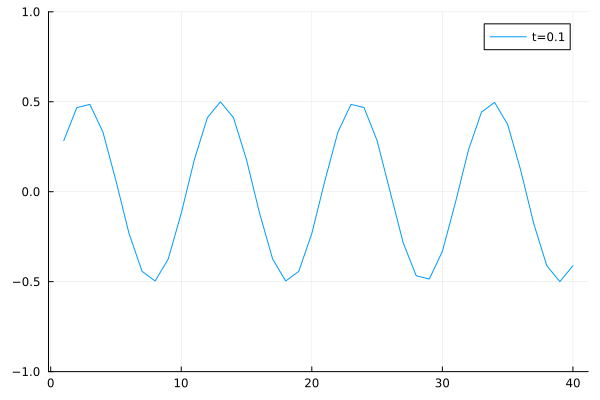

In [46]:

anim = @animate for i = 1:50
    temp_label=
    plot(Szlist1[i], label=string("t=",i/10))
    plot!(ylim=(-1,1))
end

gif(anim, "tutorial_anim_fps30.gif", fps = 10)


In [13]:
using DelimitedFiles
writedlm( "test.csv", Szlist, ',')


## The contrast

  The initial state prepared in the simulation is $|\psi(Q)\rangle=\prod_i|\varphi\rangle_i$, where
  $$
  |\varphi\rangle_i=\cos \left(Q z_i / 2\right)|\downarrow\rangle_i-\sin \left(Q z_i / 2\right)|\uparrow\rangle_i
  $$
  
  The contrast of an arbitrary time is:
  
  $$
  c(t)=\frac{4 a}{L} \sum_i\left\langle S_i^z(t)\right\rangle \cos \left(Q z_i+\theta\right)
  $$

In [58]:
contrast(ti)=sum(Szlist1[ti][i]*cos(2*pi/10.4*i+0.5pi) for i in 1:length(Szlist1[1])) /
             sum(Szlist1[1][i]*cos(2*pi/10.4*i+0.5pi) for i in 1:length(Szlist1[1]))

contrast2(ti)=sum(Szlist2[ti][i]*cos(2*pi/10.4*i) for i in 1:length(Szlist2[1])) /
             sum(Szlist2[1][i]*cos(2*pi/10.4*i) for i in 1:length(Szlist2[1]))

contrast2 (generic function with 1 method)

In [71]:
function contrast_plot(Szlist,flip)
    timestep=size(Szlist)[1];
    contrast=zeros(timestep);
    for ti in 1:timestep
        contrast[ti]=sum(Szlist[ti][i]*cos(2*pi/10.4*i+0.5pi*flip) for i in 1:length(Szlist1[1]));
    end
    contrast=contrast./sum(Szlist[1][i]*cos(2*pi/10.4*i+0.5pi*flip) for i in 1:length(Szlist1[1]));
    return(contrast) 
end

contrast_plot (generic function with 1 method)

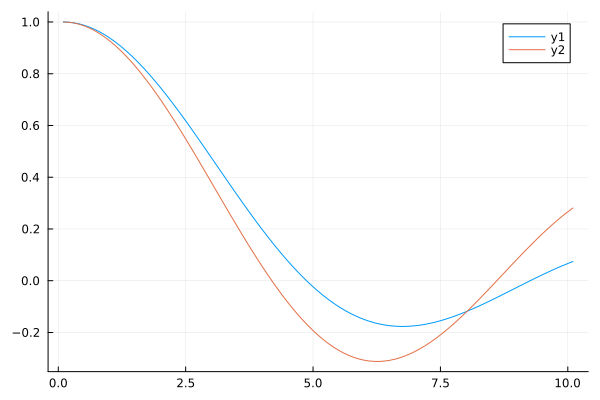

In [59]:
ttilt1=0.1*[1:101;]
ttilt2=0.1*[1:101;]
plot(ttilt1,contrast.([1:101;]))
plot!(ttilt2,contrast2.([1:101;]))


In [64]:
size(Szlist1)[1]

101

In [55]:
sum(Szlist1[1][i]*cos(2*pi/10.4*i+0.5pi) for i in 1:length(Szlist1[1]))

-10.338651221760623

In [36]:
Szlistt=XXZquench(10.4,0.1,0.1;Δ=0,flip=true);

0.0   

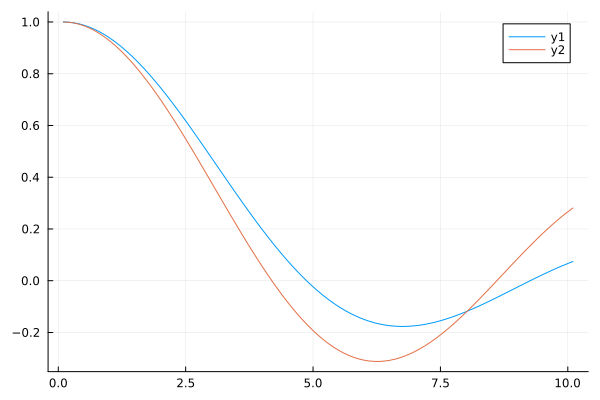

In [76]:
plot(ttilt1,contrast_plot(Szlist1,true))
plot!(ttilt2,contrast_plot(Szlist2,false))